### Import libraries

In [1]:
from sklearn import datasets, linear_model
from scipy import linalg
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import requests

### Reading the data

In [3]:
target_url = 'https://users.stat.ufl.edu/~winner/data/airq402.dat'

response = requests.get(target_url)

SSLError: HTTPSConnectionPool(host='users.stat.ufl.edu', port=443): Max retries exceeded with url: /~winner/data/airq402.dat (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))

In [ ]:
data_dat = response.text

data_list = data_dat.splitlines() 

data_content = [e.split() for e in data_list] 

In [ ]:
print(data_content)

In [5]:
cols = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers',
                   'market leading airline', 'market share', 'Average fare', 'Low price airline',
                   'market share', 'price']

In [6]:
data = pd.DataFrame(data_content, columns = cols)
data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [7]:
data.columns = data.columns.str.replace(" ","_")

In [8]:
data.columns = data.columns.str.replace(".","_")
data.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [9]:
data.rename(columns={data.columns[7] : 'Average_fare_1'}, inplace=True)
data.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare_1,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [10]:
column_names = data.columns.values
column_names[9] = 'market_share_1'
data.columns = column_names

In [11]:
data.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare_1,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [12]:
# Converting string of numbers (as a result of .split()) to floats

data['Average_Fare'] = data['Average_Fare'].astype(float)
data['Distance'] = data['Distance'].astype(float)
data['Average_weekly_passengers'] = data['Average_weekly_passengers'].astype(float)
data['market_share'] = data['market_share'].astype(float)
data['Average_fare_1'] = data['Average_fare_1'].astype(float)
data['market_share_1'] = data['market_share_1'].astype(float)
data['price'] = data['price'].astype(float)

In [13]:
#Since there is not much difference between Average_Fare and Average_Fare_1
data1 = data.drop(['Average_fare_1'], axis = 1)
data1.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42


In [14]:
data1.describe()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,100.000000,387.940000


In [15]:
data1.describe(include= ['O'])

,City1,City2,market_leading_airline,Low_price_airline
count,1000,1000,1000,1000
unique,90,85,16,19
top,ATL,TPA,WN,WN
freq,64,46,257,230


In [16]:
data1.isnull().any()

City1                        False
City2                        False
Average_Fare                 False
Distance                     False
Average_weekly_passengers    False
market_leading_airline       False
market_share                 False
Low_price_airline            False
market_share_1               False
price                        False
dtype: bool

## EDA

count    1000.00000
mean      163.37542
std        55.36547
min        50.52000
25%       125.97500
50%       161.34500
75%       197.39250
max       401.23000
Name: Average_Fare, dtype: float64


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


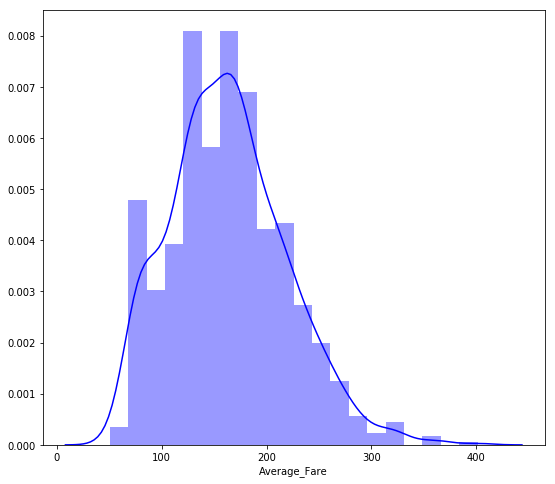

In [17]:
print(data1['Average_Fare'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data1['Average_Fare'], color='b', bins=20, hist_kws={'alpha': 0.4});

In [18]:
#skewed towards the right , with some outliers

In [19]:
data1_num = data1.select_dtypes(include = ['float64', 'int64'])
data1_num.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price
0,114.47,528.0,424.56,70.19,70.19,111.03
1,122.47,860.0,276.84,75.10,17.23,118.94
2,214.42,852.0,215.76,78.89,2.77,167.12
3,69.40,288.0,606.84,96.97,96.97,68.86
4,158.13,723.0,313.04,39.79,15.34,145.42


### Numerical feature analysis:

In [20]:
data1_num_corr = data1_num.corr()['Average_Fare'][:-1] # -1 because the latest row is Average_Fare
golden_features_list = data1_num_corr[abs(data1_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Average_Fare:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Average_Fare:
Average_Fare    1.000000
Distance        0.587169
Name: Average_Fare, dtype: float64


In [21]:
#Plotting scatter plots of Independent Variable vs Dependent Variable.

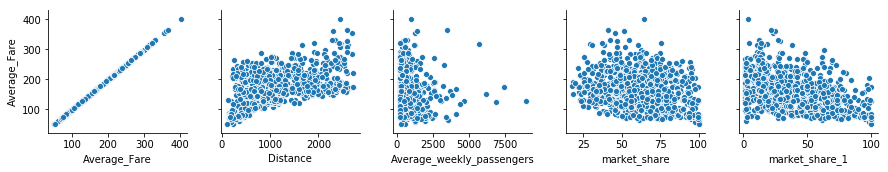

In [22]:
for i in range(0, len(data1_num.columns), 6):
    sns.pairplot(data=data1_num,
                x_vars=data1_num.columns[i:i+5],
                y_vars=['Average_Fare'])

In [23]:
# we can see that out of these numerical features, distance, price, market_share share some relationship with the target variable

In [24]:
# Average_weekly_passengers - data is scattered with huge outliers, and most data is concentrated within sum of 2500. Very random, no pattern

In [25]:
# market_share1 seems to be uniformly distributed.

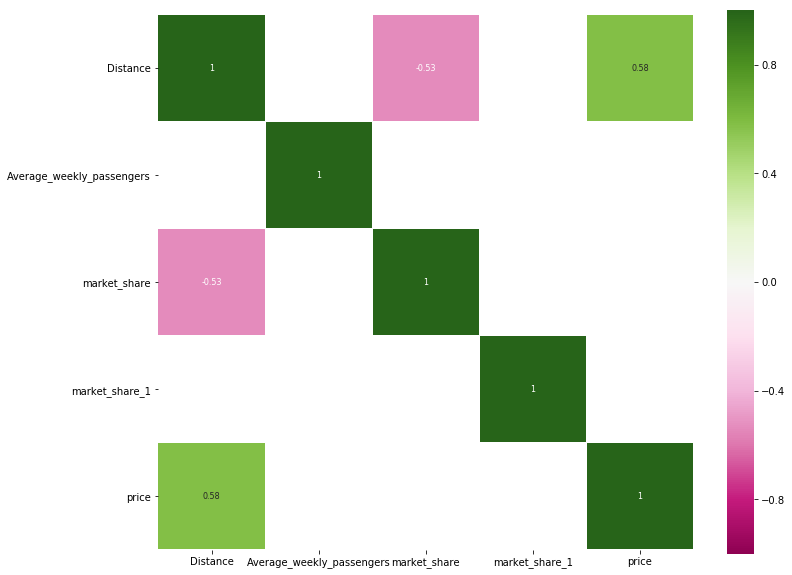

In [26]:
corr = data1_num.drop('Average_Fare', axis=1).corr() # Check for multicollinearity using heat map
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap="PiYG", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [27]:
# the correlation between distance and price is highest 0.58
# the correlation between distance and market_share is 2nd highest -0.53
# the market_share and price however share a low correlation of -0.31 (so we will keep them both)
# market_share_1 has a higher correlation 0.37 (>0.31) with distance as compared to market_share but still it is less
# average_weekly_passengers doesn't have correlation with any of the features nor with the target variable

### Categorical feature analysis:

In [28]:
data1_cat = data1.select_dtypes(include = ['object'])
data1_cat.head()

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [29]:
x=data1.groupby(['City1', 'Average_Fare'], as_index = False).count().sort_values(by = 'Average_Fare',ascending = False)
x.head()

,City1,Average_Fare,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
967,SFO,401.23,1,1,1,1,1,1,1,1
673,LGA,365.93,1,1,1,1,1,1,1,1
645,LAX,361.57,1,1,1,1,1,1,1,1
195,BOS,355.15,1,1,1,1,1,1,1,1
644,LAX,330.28,1,1,1,1,1,1,1,1


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


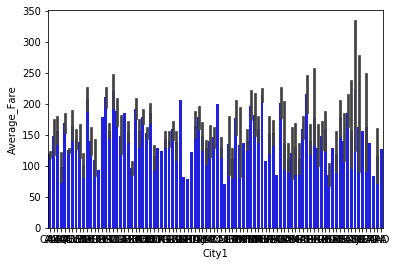

In [30]:
sns.barplot('City1', 'Average_Fare', data=np.round(data1,3), color="blue")
plt.show()

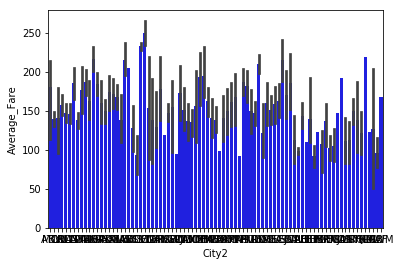

In [31]:
sns.barplot('City2', 'Average_Fare', data=np.round(data1,3), color="blue")
plt.show()

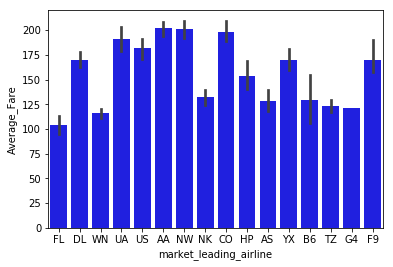

In [32]:
sns.barplot('market_leading_airline', 'Average_Fare', data=np.round(data1,3), color="blue")
plt.show()

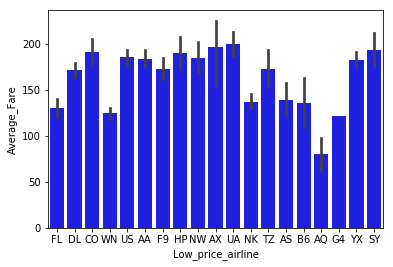

In [33]:
sns.barplot('Low_price_airline', 'Average_Fare', data=np.round(data1,3), color="blue")
plt.show()

In [34]:
#Categorical variables have too many variables for City1 and City2, encoding is not an option for them

In [35]:
data1.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42


## Check for outliers

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


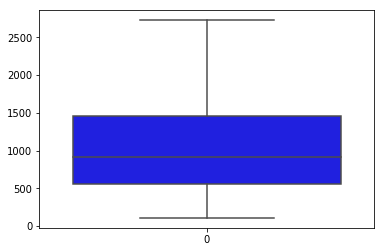

In [36]:
#Distance
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,3], color="blue")

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


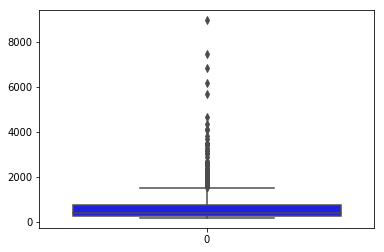

In [37]:
#Average weekly pass
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,4], color="blue")

In [38]:
# huge no. of outliers

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


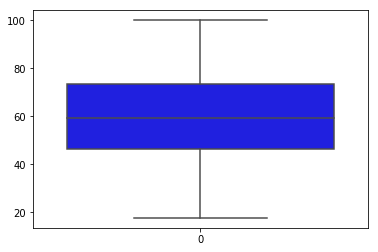

In [39]:
#market_share
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,6], color="blue") 

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


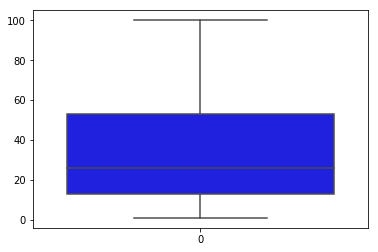

In [40]:
## market_share1
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,8], color="blue")  

In [41]:
#outlier treatment -  clubbing beyond P1 and P99 percentiles

In [42]:
dist = data1_num['Distance'].values  #series to array 
p1_dist = np.percentile(dist, 1) #percentile values
p2_dist = np.percentile(dist, 99)
print(p1_dist, p2_dist)

187.95 2586.01


In [43]:
passe = data1_num['Average_weekly_passengers'].values  #series to array 
p1_passe = np.percentile(passe, 1) #percentile values
p2_passe = np.percentile(passe, 99)
print(p1_passe, p2_passe)

184.33679999999998 3699.3012999999996


In [44]:
ms = data1_num['market_share'].values  #series to array 
p1_ms = np.percentile(ms, 1) #percentile values
p2_ms = np.percentile(ms, 99)
print(p1_ms, p2_ms)

22.9443 99.6801


In [45]:
ms1 = data1_num['market_share_1'].values  #series to array 
p1_ms1 = np.percentile(ms1, 1) #percentile values
p2_ms1 = np.percentile(ms1, 99)
print(p1_ms1, p2_ms1)

1.3099 99.6801


In [46]:
data1_list = [data1]

for dataset1 in data1_list:
    dataset1.loc[dataset1.Distance < 187.95, 'Distance' ] = 187.95
    dataset1.loc[dataset1.Distance > 2586.01, 'Distance' ] = 2586.01
    
    dataset1.loc[dataset1.Average_weekly_passengers < 184.33, 'Average_weekly_passengers' ] = 184.33
    dataset1.loc[dataset1.Average_weekly_passengers > 3699.30, 'Average_weekly_passengers' ] = 3699.30
    
    dataset1.loc[dataset1.market_share < 22.9443, 'market_share' ] = 22.9443 
    dataset1.loc[dataset1.market_share > 99.6801, 'market_share' ] = 99.6801
    
    dataset1.loc[dataset1.market_share_1 < 1.3099, 'market_share_1' ] = 1.3099
    dataset1.loc[dataset1.market_share_1 > 99.6801, 'market_share_1' ] = 99.6801

## Dummy treatment for categorical data

In [47]:
df1 = data1
df1.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42


In [48]:
MLA_Dum = pd.get_dummies(df1.market_leading_airline,prefix='MLA',drop_first=True)
MLA_Dum.head()

,MLA_AS,MLA_B6,MLA_CO,MLA_DL,MLA_F9,MLA_FL,MLA_G4,MLA_HP,MLA_NK,MLA_NW,MLA_TZ,MLA_UA,MLA_US,MLA_WN,MLA_YX
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
LPA_Dum = pd.get_dummies(df1.Low_price_airline,prefix='LPA',drop_first=True)
LPA_Dum.head()

,LPA_AQ,LPA_AS,LPA_AX,LPA_B6,LPA_CO,LPA_DL,LPA_F9,LPA_FL,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
modeldata = pd.concat([df1, MLA_Dum, LPA_Dum],axis=1)
modeldata.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86,...,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42,...,0,0,0,0,0,0,0,0,1,0


In [51]:
modeldata1 = modeldata.drop(['City1', 'City2', 'market_leading_airline', 'Low_price_airline'], axis = 1)
modeldata1.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,114.47,528.0,424.56,70.19,70.19,111.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,17.23,118.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,2.77,167.12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288.0,606.84,96.97,96.97,68.86,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,15.34,145.42,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Cross Validation

In [52]:
from sklearn import cross_validation as cv
df_train, df_test = cv.train_test_split(modeldata1,test_size=0.30,random_state=1234)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
df_train.shape, df_test.shape

((700, 39), (300, 39))

In [54]:
XTrain = df_train.iloc[:,list(range(1,6)) + list(range(6,df_train.shape[1]))].as_matrix()
YTrain = df_train['Average_Fare']

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [55]:
XTest = df_test.iloc[:,list(range(1,6)) + list(range(6,df_test.shape[1]))].as_matrix()
YTest = df_test['Average_Fare']

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [56]:
XTrain.shape,YTrain.shape

((700, 38), (700,))

In [57]:
XTest.shape,YTest.shape

((300, 38), (300,))

## Multiple Linear Regression Model

In [58]:
regr = linear_model.LinearRegression(normalize=True)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [59]:
regr.fit(XTrain,YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [60]:
regr.score(XTrain,YTrain)

0.8737640723484686

In [61]:
regr.score(XTest,YTest)

0.8568472244187118

In [62]:
from scipy import stats

In [63]:
def acc(X, Y, model):
    Y = np.array(Y)
    yhat = model.predict(X)
    SSR = sum((Y-yhat)**2)
    SST = sum((Y - np.mean(Y))**2)
    Rsquared = 1 - (float(SSR))/SST
    adjRsquared = 1 - (1-Rsquared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    
    return Rsquared, adjRsquared

In [64]:
acc(XTest, YTest, regr)

(0.856847224418712, 0.8360050578589842)

## Feature importance

In [65]:
def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    return MAPE, MSSE

In [66]:
# for varible importance, use ensemble method

In [67]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(XTrain, YTrain)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [68]:
# Score for XGB regressor

In [69]:
print('Gradient Boosting score": %.4f' % model.score(XTest, YTest))

Gradient Boosting score": 0.8768


In [70]:
feature_labels = np.array(modeldata1.columns)
feature_labels

array(['Average_Fare', 'Distance', 'Average_weekly_passengers',
       'market_share', 'market_share_1', 'price', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX'], dtype=object)

In [71]:
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

LPA_WN-0.00%
MLA_YX-0.00%
MLA_HP-0.00%
LPA_FL-0.00%
MLA_AS-0.00%
LPA_AQ-0.00%
MLA_FL-0.00%
LPA_US-0.03%
LPA_TZ-0.04%
LPA_HP-0.07%
LPA_NK-0.12%
LPA_UA-0.14%
LPA_AS-0.17%
LPA_B6-0.18%
LPA_G4-0.23%
MLA_F9-0.36%
MLA_CO-0.37%
LPA_NW-0.42%
MLA_UA-0.46%
LPA_DL-0.48%
MLA_DL-0.56%
LPA_AX-0.61%
MLA_WN-0.75%
MLA_NW-0.87%
MLA_TZ-1.16%
LPA_CO-1.18%
price-1.20%
MLA_G4-1.36%
LPA_F9-1.49%
MLA_NK-1.67%
MLA_B6-1.96%
LPA_SY-2.04%
Distance-4.04%
MLA_US-4.24%
Average_weekly_passengers-10.05%
Average_Fare-12.70%
market_share_1-24.96%
market_share-26.08%


In [72]:
s1 = pd.Series(list(feature_labels), name='feature')

In [73]:
s2 = pd.Series(list(importance), name='variable imp')

In [74]:
imp = pd.concat([s1, s2], axis=1)
imp.head()

,feature,variable imp
0,Average_Fare,0.127014
1,Distance,0.040403
2,Average_weekly_passengers,0.100534
3,market_share,0.260754
4,market_share_1,0.249650


In [75]:
imp_df = imp[imp['variable imp'] > .02] 
imp_df.head(11)

,feature,variable imp
0,Average_Fare,0.127014
1,Distance,0.040403
2,Average_weekly_passengers,0.100534
3,market_share,0.260754
4,market_share_1,0.249650
18,MLA_US,0.042362
33,LPA_SY,0.020409


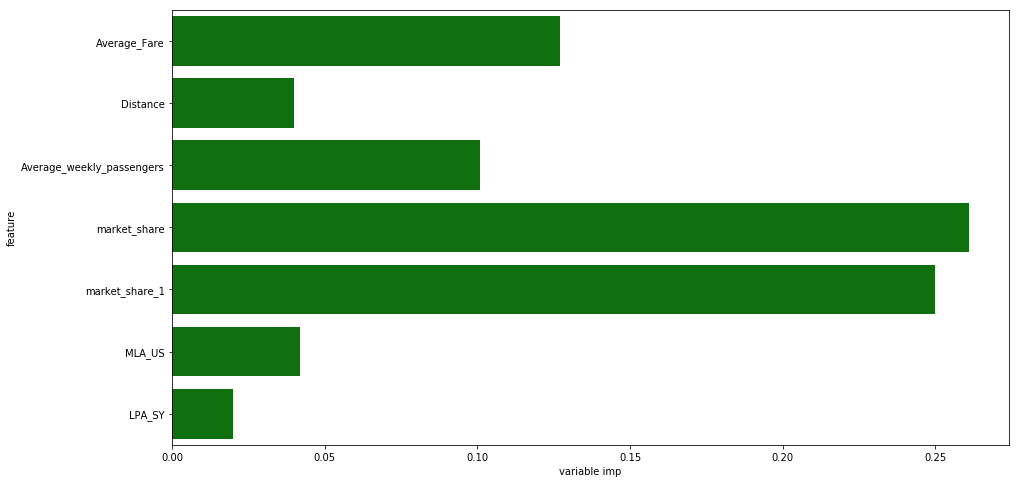

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.barplot('variable imp', 'feature', data=np.round(imp_df,3), color="green")

## PCA

In [77]:
modeldata1.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,114.47,528.0,424.56,70.19,70.19,111.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,17.23,118.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,2.77,167.12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288.0,606.84,96.97,96.97,68.86,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,15.34,145.42,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
features = list(feature_labels)

In [79]:
# Separating out the features
x= modeldata1.loc[:, features].values

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [81]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[454824.09214032 366539.92668855   3114.44488775]
[0.55084451 0.44392219 0.00377195]
[0.55084451 0.99476671 0.99853866]


In [82]:
principalDf1.head()

,pc1,pc2,pc3
0,230.287855,-531.003267,-28.976389
1,-113.061259,-410.208428,-35.269191
2,-154.861400,-456.241808,67.253969
3,533.388862,-565.687327,-74.710060
4,8.341789,-475.554026,17.861898


Text(0.5, 0.92, 'PCA on the train data')

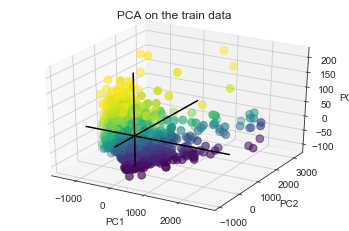

In [83]:
result = principalDf1
# Run The PCA
sns.set_style("white")
# Store results of PCA in a data frame
#result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D  # pycharm auto import
modeldata1['Average_Fare']=pd.Categorical(modeldata1['Average_Fare'])
my_color=modeldata1['Average_Fare'].cat.codes

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['pc1'], result['pc2'], result['pc3'], c=my_color, cmap='viridis', s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['pc1']), max(result['pc1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'black')
yAxisLine = ((0, 0), (min(result['pc2']), max(result['pc2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'black')
zAxisLine = ((0, 0), (0,0), (min(result['pc3']), max(result['pc3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'black')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the train data")

In [84]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])

In [85]:
print (pca.explained_variance_ratio_.cumsum())

[0.55084451 0.99476671 0.99853866 0.99940361 0.99979635 0.99999834
 0.99999861 0.99999878 0.99999894]


In [86]:
# so optimal number of PC components = 7

In [87]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])

In [88]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,230.287855,-531.003267,-28.976389,24.345168,3.438862,5.163575,-0.732295
1,-113.061259,-410.208428,-35.269191,-17.539560,-1.505145,-21.337863,-0.445561
2,-154.861400,-456.241808,67.253969,-29.005143,11.169400,-10.166561,-0.274099
3,533.388862,-565.687327,-74.710060,39.544695,28.829345,-0.340149,0.364297
4,8.341789,-475.554026,17.861898,-18.866503,-29.523437,4.818309,0.585350


In [89]:
from sklearn.cross_validation import train_test_split
#Join 'default' in to the train_pDf dataframe
train_principalDf_xy = pd.concat([principalDf, modeldata1['Average_Fare']], axis = 1) 

train_principalDf_xy_1 = train_principalDf_xy

#train_principal_DF_xy_1 is the final transformed train data set

X = train_principalDf_xy_1[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7']] 
Y = train_principalDf_xy_1['Average_Fare']

In [90]:
Xtrain_pc, Xtest_pc, Ytrain_pc, Ytest_pc = cv.train_test_split(X,Y,test_size = 0.30, random_state = 34)

### L1 Regularization

In [91]:
lassoMod = linear_model.Lasso(alpha=0.9) 

In [92]:
lassoMod.fit(Xtrain_pc,Ytrain_pc)

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
print (lassoMod.coef_)

[-0.04165982  0.02889206  0.77129834 -0.21578258  0.37809843  0.45304218
  0.        ]


In [94]:
lassoMod.coef_[((lassoMod.coef_)!=0)]

array([-0.04165982,  0.02889206,  0.77129834, -0.21578258,  0.37809843,
        0.45304218])

In [95]:
lassoMod.score(Xtrain_pc,Ytrain_pc)

0.9999973996026496

In [96]:
lassoMod.score(Xtest_pc,Ytest_pc)

0.9999972462961124

## Conclusion:

1. Features like price, market_share, distance have similar distribution like average_fare

2. We noticed that out of the numerical features, distance, price, market_share share significant relationship with the target variable


3. The passengers data is scattered with huge outliers, and most data is concentrated within sum of 2300. The data seems to be uniform, with no pattern

4. By looking at correlation between numerical values we discovered 2 features which have a strong relationship distance and price which indeed makes sense. Correlation = 0.58

5. The correlation between distance and market_share is 2nd highest, negative correlation of -0.53

6. Categorical variables like City1 and City2, has too many levels, so encoding is not an option for them but the categorical variables Low_price_airlin and market_leading_airline can be dummified as the no. of levels are reasonable

7. The most important features are Price, Distance, Market_shares, Passengers and MLA_US

8. Feature importances showed that certain dummyfied variables do hold importance, so we have to take categorical features into consideration, there were 7 features.

9. PCA analysis also exhibited 7 number of optimal components

### Other Methods of imroving the prediction

1. Random Forest Regressor 

2. XGBoost Regressor (showed above)

3. Applying Grid search algorithms to find out the optimal rangeof hyper prarameters